[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obidjonovD/Xalqaro-savdo-va-eksport-import-oqimlari/blob/main/Xalqaro-savdo-va-eksport-import-oqimlari.ipynb)


# **📊 Xalqaro savdo va eksport-import oqimlari**

## **1-qadam. Kutubxonalarni chaqirish**

Kerakli kutubxonalarni chaqiramiz:  
- `wbdata` – Jahon banki API orqali savdo ma’lumotlarini olish  
- `pandas` – jadval shaklida ishlash  
- `matplotlib` – grafiklar chizish

In [13]:
!pip install wbdata --quiet

import wbdata
import pandas as pd
import matplotlib.pyplot as plt

## **2-qadam. Indikatorlarni tanlash**

Xalqaro savdo uchun muhim ko‘rsatkichlar:  
- `NE.EXP.GNFS.ZS` – Eksport (YaIM foizida)  
- `NE.IMP.GNFS.ZS` – Import (YaIM foizida)  
- `NE.TRD.GNFS.ZS` – Savdo hajmi (YaIM foizida)

In [14]:
# Indikatorlar
indicators = {
    "NE.EXP.GNFS.ZS": "Eksport",   # Eksport (% YaIM)
    "NE.IMP.GNFS.ZS": "Import",    # Import (% YaIM)
    "NE.TRD.GNFS.ZS": "Savdo",     # Savdo (% YaIM)
}

## **3-qadam. Ma’lumotlarni yuklab olish**

Dunyo (WLD) bo‘yicha eksport-import ma’lumotlarini yuklaymiz.


In [15]:
# Dunyo bo‘yicha ma’lumotlar
df = wbdata.get_dataframe(indicators, country="WLD")

## **4-qadam. Vaqt indeksini sozlash**

Indeksni `datetime` formatiga o‘tkazamiz va tartiblaymiz.

In [16]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()

## **5-qadam. Oraliqni tanlash**

1980–2024 yillar oralig‘ini ko‘rib chiqamiz.

In [17]:
# 1980–2024 yillarni tanlash
df = df.loc["1980":"2024"]

## **6-qadam. Grafiklar chizish**

Eksport, import va umumiy savdoni taqqoslab ko‘rsatamiz.


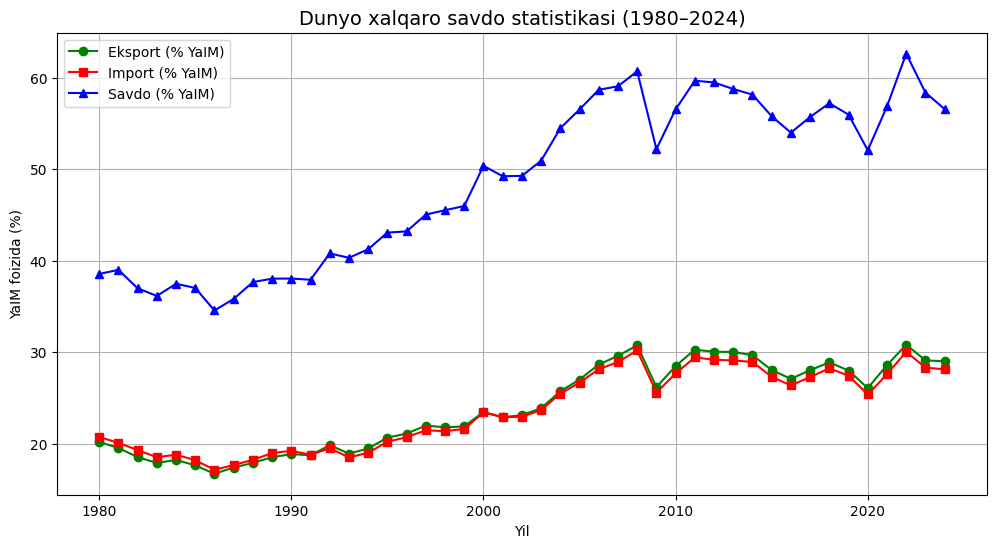

In [18]:
plt.figure(figsize=(12, 6))

plt.plot(df.index.year, df["Eksport"], marker="o", label="Eksport (% YaIM)", color="green")
plt.plot(df.index.year, df["Import"], marker="s", label="Import (% YaIM)", color="red")
plt.plot(df.index.year, df["Savdo"], marker="^", label="Savdo (% YaIM)", color="blue")

plt.title("Dunyo xalqaro savdo statistikasi (1980–2024)", fontsize=14)
plt.xlabel("Yil")
plt.ylabel("YaIM foizida (%)")
plt.legend()
plt.grid(True)
plt.show()